
# Landlab Landslide Probability Model with Saturation 

<img src="https://www.washington.edu/brand/files/2014/09/W-Logo_Purple_Hex.png" style="float:right;width:200px;padding:20px">   

## Python 3 Kernal Required
<br />
This Jupyter Notebook runs the Landlab LandslideProbability component on a synthetic 
Landlab grid using four depth to water table options to replace recharge options described in the paper: <br />
#### Strauch et al. 2018. A hydro-climatological approach to predicting regional landslide probability using Landlab. Earth Surface Dynamics, 6, 1-26. <br /> 
This notebook performs the following functions:<br >
* Import libraries and set HydroShare variables<br />
* Create a grid and data fields used to calculate landslide probability<br />
* Specify Depth to Water Table Distributions to compare four options<br /> 
* Run LandslideProbability function from Landlab landslide component<br /> 
* Compare the sensitivity based on four Depth to Water Table options<br /> 



## 1.  HydroShare Setup and Preparation

To run this notebook, we must import several libraries.
The hs_utils library provides functions for interacting with HydroShare, including resource querying, dowloading, and creation.  Additional libraries support the functions of Landlab. 

In [1]:
import warnings
print('Ignore deprecation warnings')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


Ignore deprecation warnings


In [36]:
!pip install rasterio

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from rasterio.warp import transform
#import transform

In [3]:
#import Python utilities for calculating and plotting
import six
import os

#import utilities for importing and exporting to HydroShare
from utilities import hydroshare
# set variables for interacting with HydroShare from this notebook
hs=hydroshare.hydroshare()
# Create object to map the home directory
hs=hydroshare.hydroshare()
homedir = os.getcwd()
print('Data will be loaded from and saved to:'+homedir)
os.chdir('/home/jovyan/work/notebooks/data/4cac25933f6448409cab97b293129b4f/4cac25933f6448409cab97b293129b4f/data/contents')
print(homedir)

# Import Landlab libraries
import landslide_probability
from landslide_probability_20191208 import LandslideProbability
from landlab import RasterModelGrid
from landlab import imshow_grid_at_node

from landlab.io.netcdf import read_netcdf
from landlab.io.netcdf import write_netcdf

import numpy as np
import xarray as xr
import pandas as pd
import itertools

from landlab.io import read_esri_ascii
from landlab.io import write_esri_ascii



Successfully established a connection with HydroShare
Successfully established a connection with HydroShare
Data will be loaded from and saved to:/home/jovyan/work/notebooks/data/4cac25933f6448409cab97b293129b4f/4cac25933f6448409cab97b293129b4f/data/contents
/home/jovyan/work/notebooks/data/4cac25933f6448409cab97b293129b4f/4cac25933f6448409cab97b293129b4f/data/contents
You are not going crazy...
You are not going crazy...


In [4]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
print('Ignore deprecation warnings')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

Ignore deprecation warnings


# Import data

## Give HydroShare ID linked to the data for the Jupyter Notebook. Do this every time.

In [7]:
Data_ResourceID='01b486f301864828ba2cd9ab7ac77c4e'


## Move data from HydroShare to JupyterHub Server User space and decompress. 

## Do this one time.  No need to overwrite unless the data has changed.

In [ ]:
#hs.getResourceFromHydroShare(Data_ResourceID)
#!gunzip /home/jovyan/work/notebooks/data/01b486f301864828ba2cd9ab7ac77c4e/01b486f301864828ba2cd9ab7ac77c4e/data/contents/DHSVM/*

## Continue importing data to Jupyter Notebook. Do this every time.

In [8]:
landslide_folder = '/home/jovyan/work/notebooks/data/'+ Data_ResourceID +'/'+Data_ResourceID+'/data/contents/ASCII_Files/'

In [9]:
print('If you get an error, go back up one code block and uncomment the code to get the HydroShare resource and unzip')

If you get an error, go back up one code block and uncomment the code to get the HydroShare resource.


If you are curious about where the data is being downloaded, click on the Jupyter Notebook dashboard icon to see a File System view.  The homedir directory location printed above is where you can find the data and contents you will download to a HydroShare JupyterHub server.  At the end of this work session, you can migrate this data to the HydroShare iRods server as a Generic Resource. 

In [20]:
landslide_folder = '/home/jovyan/work/notebooks/data/'+ Data_ResourceID +'/'+Data_ResourceID+'/data/contents/ASCII_Files/'
print('This is the location on the HydroShare JupyterHub server where the Landlab model input GIS data has just been downloaded:')
print(landslide_folder)
print()
dhsvm_folder = '/home/jovyan/work/notebooks/data/'+ Data_ResourceID +'/'+Data_ResourceID+'/data/contents/DHSVM/'
print('This is the location on the HydroShare JupyterHub server where the Hydrology Model data has just been downloaded:')
print(dhsvm_folder)
print()
dates_folder = '/home/jovyan/work/notebooks/data/'+ Data_ResourceID +'/'+Data_ResourceID+'/data/contents/DHSVM/dates_max_sat_skagit'
print('This is the location on the HydroShare JupyterHub server where the storm dates printed from the hydrology model has just been downloaded:')
print(dates_folder)
print()
data_folder = '/home/jovyan/work/notebooks/data/'+ Data_ResourceID +'/'+Data_ResourceID+'/data/contents/'
print('This is the location on the HydroShare JupyterHub server where the spatial domain data has just been downloaded:')
print(data_folder)

This is the location on the HydroShare JupyterHub server where the Landlab model input GIS data has just been downloaded:
/home/jovyan/work/notebooks/data/01b486f301864828ba2cd9ab7ac77c4e/01b486f301864828ba2cd9ab7ac77c4e/data/contents/ASCII_Files/

This is the location on the HydroShare JupyterHub server where the Hydrology Model data has just been downloaded:
/home/jovyan/work/notebooks/data/01b486f301864828ba2cd9ab7ac77c4e/01b486f301864828ba2cd9ab7ac77c4e/data/contents/DHSVM/

This is the location on the HydroShare JupyterHub server where the storm dates printed from the hydrology model has just been downloaded:
/home/jovyan/work/notebooks/data/01b486f301864828ba2cd9ab7ac77c4e/01b486f301864828ba2cd9ab7ac77c4e/data/contents/DHSVM/dates_max_sat_skagit

This is the location on the HydroShare JupyterHub server where the spatial domain data has just been downloaded:
/home/jovyan/work/notebooks/data/01b486f301864828ba2cd9ab7ac77c4e/01b486f301864828ba2cd9ab7ac77c4e/data/contents/


In [21]:
# 1. Dates for printing output for Hydrology model; DHSVM; 150 m depth to groundwater
dates_filename = 'export_historic_dates'
dates_file = '{}/{}'.format(dates_folder, dates_filename)

# 2. Hydrology model; DHSVM; 150 m depth to groundwater
dhsvm_filename='Map.Soil.TableDepth.asc'
dhsvm_file = '{}/{}'.format(dhsvm_folder, dhsvm_filename)

# 3. Spatial domain for hydrology model (Skagit Hydrology Model DHSVM domain; 150 m grid cell)
url_dem = '{}/{}'.format(data_folder, "demsrtm150f1.tif")

# 4. Spatial domain for landslide model (Seattle City Light Landslide Model Domain; 30 m grid cell)
url_mask = '{}/{}'.format(data_folder, "sclmask09_301.tif")

## Use DHSVM.Map output for Depth to Water Table to calculate landslide probability

## Elevation Domain Data Processing

Markdown on xarray Needed  da=data array

In [14]:
da = xr.open_rasterio(url_dem)
da

<xarray.DataArray (band: 1, y: 1020, x: 916)>
[934320 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 5.464e+06 5.464e+06 5.464e+06 ... 5.312e+06 5.311e+06
  * x        (x) float64 5.357e+05 5.359e+05 5.36e+05 ... 6.728e+05 6.73e+05
Attributes:
    transform:   (150.0, 0.0, 535665.0, 0.0, -150.0, 5464395.0)
    crs:         +init=epsg:26910
    res:         (150.0, 150.0)
    is_tiled:    1
    nodatavals:  (-9999.0,)

In [15]:
da_mask = xr.open_rasterio(url_mask)
da_mask

<xarray.DataArray (band: 1, y: 2720, x: 2725)>
[7412000 values with dtype=int16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 5.436e+06 5.436e+06 5.436e+06 ... 5.355e+06 5.355e+06
  * x        (x) float64 5.913e+05 5.914e+05 5.914e+05 ... 6.73e+05 6.730e+05
Attributes:
    transform:   (30.0, 0.0, 591315.0, 0.0, -30.0, 5436495.0)
    crs:         +init=epsg:26910
    res:         (30.0, 30.0)
    is_tiled:    1
    nodatavals:  (-32768.0,)

In [22]:
#get size of y
temp_y = da.y.values
size_y = temp_y.size
size_y

1020

## DHSVM DTW data processing

In [24]:
dates = pd.read_csv(dates_file, sep=" ", header=None)
values = np.loadtxt(dhsvm_file)

In [25]:
dhsvm_file

'/home/jovyan/work/notebooks/data/01b486f301864828ba2cd9ab7ac77c4e/01b486f301864828ba2cd9ab7ac77c4e/data/contents/DHSVM//Map.Soil.TableDepth.asc'

In [26]:
#get number of days
#dates.columns = ["Map", "txt", "number", "date"] 
dates.columns = ["Index","Map", "txt", "number", "date"] #this works with the new format
dates['date']
num = dates['date'].size
num

52

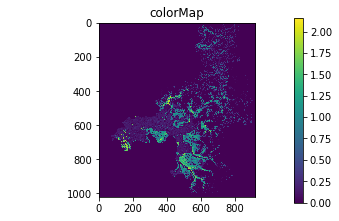

In [27]:
one_image = values[:size_y]
#second_image = values[1020:2040]

fig = plt.figure(figsize=(6, 3.2))

#plot one image to check 

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(one_image)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [28]:
#split the big concatenated depth to water table data into map/day
list_arrays = np.vsplit(values, num)

all_arrays =  np.asarray(list_arrays)

In [29]:
#create an xarray dataset conatining depth to water table

ds_wt = xr.Dataset(data_vars = {'wt': (('time', 'y', 'x'), all_arrays)})

In [30]:
#assign coordinates and plot again 
ds_wt['time'] = dates["date"].tolist()
ds_wt['y'] = da.y
ds_wt['x'] = da.x
#ds_wt = ds_wt.set_coords(['time','y', 'x'])
ds_wt

<xarray.Dataset>
Dimensions:  (time: 52, x: 916, y: 1020)
Coordinates:
  * x        (x) float64 5.357e+05 5.359e+05 5.36e+05 ... 6.728e+05 6.73e+05
  * y        (y) float64 5.464e+06 5.464e+06 5.464e+06 ... 5.312e+06 5.311e+06
  * time     (time) <U13 '06/20/1961-15' '07/01/1962-18' ... '10/23/2011-21'
Data variables:
    wt       (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

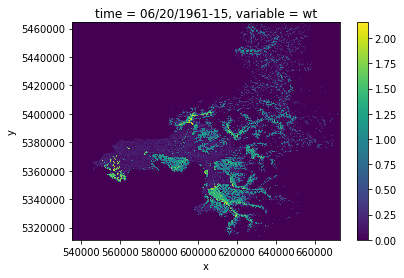

In [31]:
ds_wt.isel(time=[0]).to_array().plot()

In [48]:
#resample to SCL mask and coordinates 
y1 = da_mask.y
x1 = da_mask.x
dsi = ds_wt.interp(y = y1, x = x1)

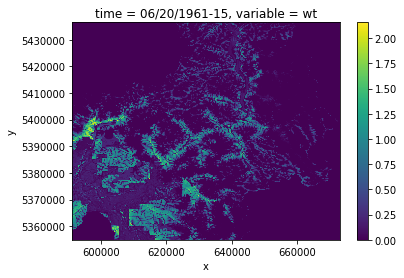

In [49]:

# plot first image of the resampled data
#plot first image, select by index

dsi.isel(time=[0]).to_array().plot()

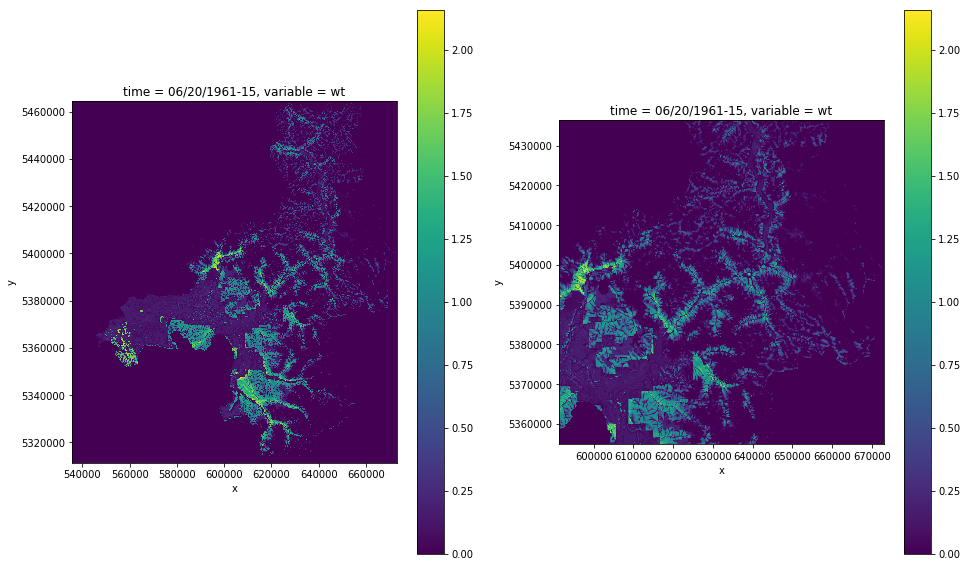

In [50]:
fig = plt.figure(figsize=(16,10))

#plot one image to check 
ax1 = fig.add_subplot(121)

ds_wt.isel(time=[0]).to_array().plot() #shows upsidedown than imshow
ax1.set_aspect('equal')

ax2 = fig.add_subplot(122)

dsi.isel(time=[0]).to_array().plot() #shows upsidedown than imshow
ax2.set_aspect('equal')

/opt/conda/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


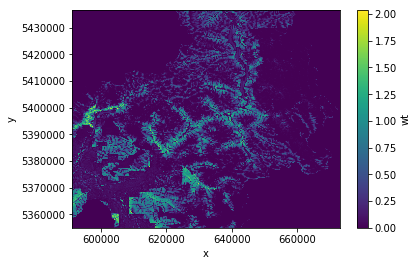

In [51]:
#calculate mean of all grid cells
mean_dtw_scl = dsi.wt.mean("time")
#plot mean
mean_dtw_scl.plot() 

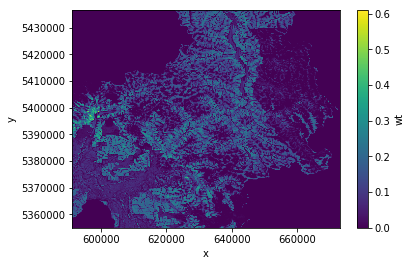

In [52]:
#calculate std of all grid cells
std_dtw_scl = dsi.wt.std("time")
#plot std
std_dtw_scl.plot() 

In [53]:
flippy = dsi.reindex(y=list(reversed(dsi.y)))

In [54]:
flippy

<xarray.Dataset>
Dimensions:  (time: 52, x: 2725, y: 2720)
Coordinates:
  * y        (y) float64 5.355e+06 5.355e+06 5.355e+06 ... 5.436e+06 5.436e+06
  * time     (time) <U13 '06/20/1961-15' '07/01/1962-18' ... '10/23/2011-21'
  * x        (x) float64 5.913e+05 5.914e+05 5.914e+05 ... 6.73e+05 6.730e+05
Data variables:
    wt       (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 nan nan

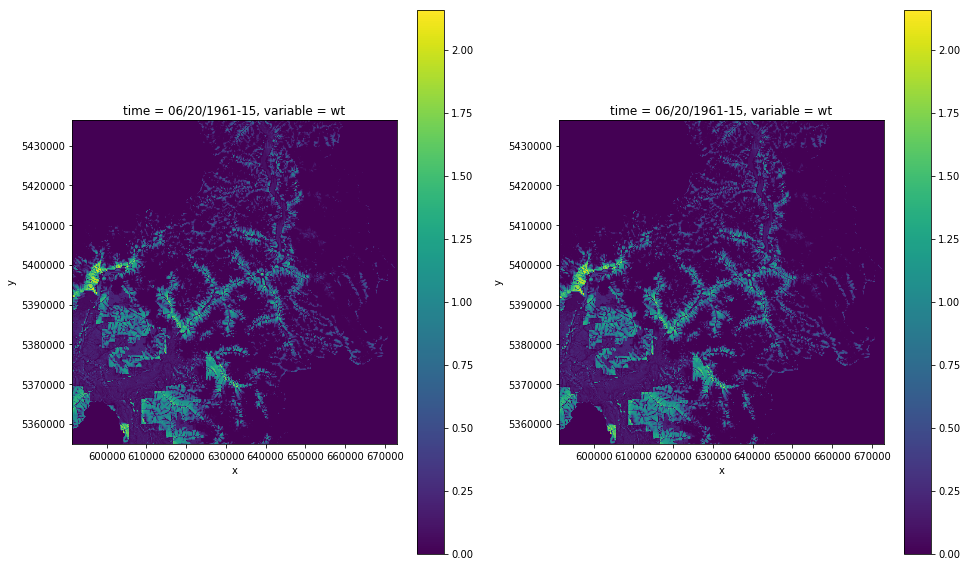

In [56]:
fig = plt.figure(figsize=(16,10))

#plot one image to check 
ax1 = fig.add_subplot(121)

dsi.isel(time=[0]).to_array().plot() #shows upsidedown than imshow
ax1.set_aspect('equal')

ax2 = fig.add_subplot(122)

flippy.isel(time=[0]).to_array().plot() #shows upsidedown than imshow
ax2.set_aspect('equal')

In [57]:
#calculate mean of all grid cells
mean_dtw_scl_flippy = flippy.wt.mean("time")
#plot mean
#mean_dtw_scl_flippy.plot() 

/opt/conda/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [58]:
#calculate std of all grid cells
std_dtw_scl_flippy = flippy.wt.std("time")
#plot std
#std_dtw_scl_flippy.plot()

### What is the difference between flatten and ravel in numpy ...https://stackoverflow.com/questions/28837312/what-is-the-difference-between-flatten-and-ravel-in-numpy 

In [59]:
mean_array=mean_dtw_scl.values.ravel()
std_array=std_dtw_scl.values.ravel()
mean_flippy_array=mean_dtw_scl_flippy.values.ravel()
std_flippy_array=std_dtw_scl_flippy.values.ravel()

In [60]:
mean_array

array([  0.,   0.,   0., ...,   0.,  nan,  nan])

#### Test that the array imports to Landlab schema as expected. Add mean array to Landlab grid. 

In [45]:
(grid, z) = read_esri_ascii(landslide_folder+'/scl_dem_30m.txt',name='topographic__elevation')
grid.at_node.keys()     # loads DEM grid with elevation
grid.set_nodata_nodes_to_closed(grid.at_node['topographic__elevation'], -9999) # set boundary conditions closed where no data

In [46]:
grid.number_of_nodes

7412000

In [62]:
grid['node']['mean_dtw'] = mean_array
grid['node']['mean_dtw_flippy'] = mean_flippy_array

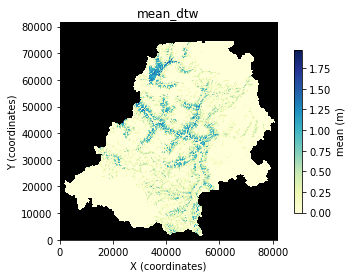

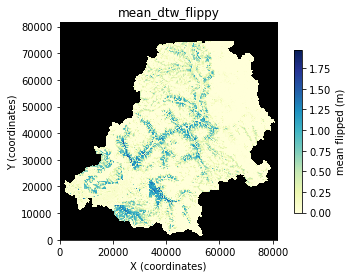

In [63]:
grid.at_node.keys()  
plt.figure('mean_dtw')
imshow_grid_at_node(grid,'mean_dtw', cmap='YlGnBu',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='mean', var_units='m')

grid.at_node.keys()  
plt.figure('mean_dtw_flippy')
imshow_grid_at_node(grid,'mean_dtw_flippy', cmap='YlGnBu',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='mean flipped', var_units='m')

In [ ]:
nodelist=np.arange(number_of_nodes)
HSD_dict_annualmaxDWT=zip(mean_array[i],std_array[i])
HSD_dict_flippytest_annualmaxDWT=zip(mean_flippy_array[i],std_flippy_array[i])

for i in range(number_of_nodes):
    HSD_dict_map[i]={nodelist[i]:HSD_dict_annualmaxDWT[i]}
    HSD_dict_map_flippytest[i]={nodelist[i]:HSD_dict_flippytest_annualmaxDWT[i]}
        
    

In [ ]:
std_flippy_array.mean()

This example uses a synthetic model domain. As a first example, make a synthetic grid with 5 rows and 4 columns space 0.2 units apart.   <br /> 
##### Synthetic Grid Restart opportunity: After completing this entire notebook, go to the Dashboard, Kernal, and select Restart and Clear Output.  Execute the code from the beginning, but change the cell below to the rows, columns, and spacing of your choice.  

In [25]:
#grid = read_netcdf('synthetic_data_driven_spatial_depth.nc')

In [36]:
number_of_nodes=2725*2720

In [44]:
# BUILDING A DTW PYTHON DICTIONARY 
HSD_dict_map={}
keys=np.arange(number_of_nodes)
ya=flippy.isel(time=0).to_array()
y=np.array(ya.y)
#print(y)
xa=flippy.isel(time=0).to_array()
x=np.array(xa.x)
std=np.array(std_dtw_scl_flippy)
mean=np.array(mean_dtw_scl_flippy)
#print(x)

In [47]:
std

array([[  0.,   0.,   0., ...,   0.,  nan,  nan],
       [  0.,   0.,   0., ...,   0.,  nan,  nan],
       [  0.,   0.,   0., ...,   0.,  nan,  nan],
       ..., 
       [  0.,   0.,   0., ...,   0.,  nan,  nan],
       [  0.,   0.,   0., ...,   0.,  nan,  nan],
       [  0.,   0.,   0., ...,   0.,  nan,  nan]])

In [49]:
w, h = len(x), len(y)
#w, h = 5, 7
bucketx = [[None] * w for i in range(h)]
xidx=[[None] * w for i in range(h)]
buckety = [[None] * h for i in range(w)]
yidx=[[None] * h for i in range(w)]
print(len(bucketx[0]))
print(len(bucketx))


2725
2720


In [50]:
w

2725

In [51]:
w, h = len(x), len(y)
#w, h = 5, 7
for i in range(w):

    buckety[i] = [y[j] for j in range(h)]
    
for i in range(w):    
    
    yidx[i]=[i for j in range(h)]
    
for k in range(h):

    bucketx[k] = [x[l] for l in range(w)]
    
for k in range(h):
    
    xidx[k]=[k for l in range(w)] 

In [52]:
print(len(bucketx[0]))
print(len(bucketx))
print(len(buckety[0]))
print(len(buckety))

2725
2720
2720
2725


In [53]:
zerolist=np.array(xidx)
list2d = zerolist.tolist()
mergedxidx = list(itertools.chain(*list2d))
print(len(mergedxidx))
print((mergedxidx[0]))

7412000
0


In [54]:
zerolist=np.array(yidx)
list2d = zerolist.tolist()
mergedyidx = list(itertools.chain(*list2d))
print(len(mergedyidx))
print((mergedyidx[0]))

7412000
0


In [55]:
zerolist=np.array(bucketx)
list2d = zerolist.tolist()
mergedx = list(itertools.chain(*list2d))
print(len(mergedx))
print((mergedx[0]))

7412000
591330


In [56]:
zerolist=np.array(buckety)
list2d = zerolist.tolist()
mergedy = list(itertools.chain(*list2d))
print(len(mergedy))

7412000


In [57]:
all_xy=zip(mergedx,mergedy,mergedxidx,mergedyidx)

In [58]:
print(all_xy[0:10])
13626
print(all_xy[13620:13626])

[(591330, 5354910, 0, 0), (591360, 5354940, 0, 0), (591390, 5354970, 0, 0), (591420, 5355000, 0, 0), (591450, 5355030, 0, 0), (591480, 5355060, 0, 0), (591510, 5355090, 0, 0), (591540, 5355120, 0, 0), (591570, 5355150, 0, 0), (591600, 5355180, 0, 0)]
[(672930, 5355510, 4, 5), (672960, 5355540, 4, 5), (672990, 5355570, 4, 5), (673020, 5355600, 4, 5), (673050, 5355630, 4, 5), (591330, 5355660, 5, 5)]


In [59]:
nodelist=np.arange(number_of_nodes)

for i in range(number_of_nodes):
    HSD_dict_map[i]={nodelist[i]:all_xy[i]}

In [ ]:
#HSD_dict_map.keys()

In [61]:
number_of_nodes=7412000
keys=np.arange(number_of_nodes)
HSD_dict_annualmaxDWT={}
for i in range(number_of_nodes):
       one_location=flippy.isel(x=[i],y=[i]).to_array()
       loc1list=np.array(one_location.variable)
       b = list(itertools.chain(*loc1list))
       c = list(itertools.chain(*b))
       d = list(itertools.chain(*c))
       HSD_dict_annualmaxDWT[i] = {keys[i]:d} 

IndexError: index 2720 is out of bounds for axis 1 with size 2720

In [63]:
HSD_dict_annualmaxDWT={}
for i in range(number_of_nodes):
       one_location=flippy.isel(x=[i],y=[i]).to_array()
       loc1list=np.array(one_location.variable)
       b = list(itertools.chain(*loc1list))
       c = list(itertools.chain(*b))
       d = list(itertools.chain(*c))
       HSD_dict_annualmaxDWT[i] = {keys[i]:d} 

IndexError: index 2720 is out of bounds for axis 1 with size 2720

In [ ]:
HSD_dict_annualmaxDWT[0]

In [ ]:
yr1flippy.isel(y=0,x=0)

In [ ]:
key=np.arange(3)
key

In [64]:
#key=np.arange(grid.number_of_nodes)
key=np.arange(0)
#for i in range(grid.number_of_nodes):
for i in range(0):
    for k in range(0):
        one_location=flippy.isel(x=[i],y=[k]).to_array()
        loc1list=np.array(one_location.variable)
        b = list(itertools.chain(*loc1list))
        c = list(itertools.chain(*b))
        d = list(itertools.chain(*c))
        HSD_dict_annualmaxDWT[i] = {key_triple[0][0]:d} 

In [65]:
HSD_dict_annualmaxDWT

{0: {0: [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]},
 1: {1: [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]},
 2: {2: [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
  

In [66]:
import itertools
b = list(itertools.chain(*loc1list))
print(list(itertools.chain(*loc1list)))
len(b)
b[0]
c = list(itertools.chain(*b))
print(list(itertools.chain(*b)))
d = list(itertools.chain(*c))
print(list(itertools.chain(*c)))
len(d)

[array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]]), array([[ 0.]])]
[array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), 

44

In [ ]:

key=np.arange(grid.number_of_nodes)
HSD_dict_annualmaxDWT=zip(test3years[x],grid['node']['YR2'],grid['node']['YR3'])
#i=1
for i in range(grid.number_of_nodes):
    HSD_dict_annualmaxDWT[i] = {key[i]:HSD_dict_annualmaxDWT[i]} 

print(HSD_dict_annualmaxDWT)


In [ ]:
testing=yr1flippy.isel(y=0,x=0,variable=0)
testing.coords


In [67]:
for i in range(grid.number_of_nodes):
    HSD_dict[i] = {key[i]:yr1flippy.isel('wt'=i)} 

#flipmeoff=zip(yr1flippy.isel(y=0),yr1flippy.isel(x=0))
#print(flipmeoff)


SyntaxError: keyword can't be an expression (<ipython-input-67-a4b92fbed36f>, line 2)

In [ ]:
for i in range(grid.number_of_nodes):
    HSD_dict[i] = {key[i]:flipmeoff[i]} 
print(HSD_dict)
print(i)

In [68]:
key=np.arange(grid.number_of_nodes)
HSD_dict_annualmaxDWT=zip(grid['node']['YR1'],grid['node']['YR2'],grid['node']['YR3'])
#i=1
for i in range(grid.number_of_nodes):
    HSD_dict_annualmaxDWT[i] = {key[i]:HSD_dict_annualmaxDWT[i]} 

print(HSD_dict_annualmaxDWT)

hwdist=pd.DataFrame.from_dict(HSD_dict_annualmaxDWT[i], orient='index')
print(hwdist.values[0])

NameError: name 'grid' is not defined

Confirm the size of the grid

In [ ]:
grid.number_of_nodes

To see what the grid id of our nodes are, execute the command below.  However, note that this command gives you the rows of the grid, but these are technically up-side-down from how the RasterModelGrid nodes are numbered (e.g,. node id 0 is at the bottom left corner of the grid). 

In [ ]:
grid.nodes

We can also see how many core nodes we have (i.e., the nodes that calculations are performed on) in the center of the grid...not the edges, which are 'closed nodes'. Compare this array to the full grid above.  Asign these to the variable 'core_nodes' so we can use these later.

In [ ]:
core_nodes = grid.core_nodes
core_nodes

Now we will create the required fields for the landslide component and add data as fields to the grid.  Thus, the data arrays will need to be as the length of the number of nodes.<br /> 
##### Data Fields Restart opportunity: After completing this entire notebook, go to the Dashboard, Kernal, and select Restart and Clear Output.  Execute the code from the beginning, but change the cell below to the data inputs of your choice.  

In [ ]:
gridnodes = grid.number_of_nodes
grid_size = grid.number_of_nodes

grid['node']['soil__density']= \
         2000. * np.ones(gridnodes)

grid['node']['soil__internal_friction_angle']= \
         np.sort(np.random.randint(26, 37, gridnodes))

grid['node']['soil__mode_total_cohesion']= \
         np.sort(np.random.randint(30, 900, gridnodes))
    
scatter_dat = np.random.randint(1, 10, gridnodes)    
grid['node']['soil__maximum_total_cohesion']= \
         grid.at_node['soil__mode_total_cohesion'] + scatter_dat

grid['node']['soil__minimum_total_cohesion']= \
         grid.at_node['soil__mode_total_cohesion'] - scatter_dat

grid['node']['soil__thickness']= \
         np.sort(np.random.randint(1, 10, gridnodes))

grid['node']['soil__transmissivity']= \
         np.sort(np.random.randint(5, 20, gridnodes),-1)
        
grid['node']['topographic__slope'] = np.random.rand(gridnodes)

grid['node']['topographic__specific_contributing_area']= \
         np.sort(np.random.randint(30, 900, gridnodes))

Let's see what one of these fields (slope) looks like on the grid.

In [ ]:
plt.figure('Slope')
imshow_grid_at_node(grid,'topographic__slope', cmap='copper_r',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='Slope', var_units='m/m')
plt.savefig('Slope.png')

In [ ]:
np.mean(grid['node']['soil__thickness'])

In [ ]:
grid['node']['soil__thickness']

In [ ]:

n=50
#distribution1 = 'uniform'
#distribution1 = 'lognormal'
#distribution1 = 'lognormal_spatial'
distribution1 = 'data_driven_spatial'
#Demin_value = 3 
#Demax_value = 6

LS_prob1=LandslideProbability(grid, number_of_iterations=n,
                     groundwater__depth_distribution='data_driven_spatial',
                     groundwater__depth_HSD_inputs=[HSD_dict_annualmaxDWT])



### Number of iterations to run Monte Carlo simulation

The landslide component employes the infinite slope model to calculate factor-of-safety values using a Monte Carlo simulation approach, which randomly selects input values from parameter distributions. You can pick the number of iterations to run Monte Carlo simulations, but the default is 250. The higher the number of iteration, the longer the program runs, but the more precise the probability of failure result becomes.<br /> 
##### Random iterations Restart opportunity: After completing this entire notebook, go to the Dashboard, Kernal, and select Restart and Clear Output.  Execute the code from the beginning, but change the cell below to the number of iterations of your choice.  

## Specify Lognormal Spatial Depth to Water Table Recharge Distribution

There are _four_ different options for providing recharge for the Monte Carlo simulation.  We'll provide each of these recharge options below by specifying a recharge distribution and the necessary parameters. <br /> 
##### Restart opportunity: After completing this entire notebook, go to the Dashboard, Kernal, and select Restart and Clear Output.  Execute the code from the beginning, but change the cells below to adjust the recharge distributions.

 ### 1. Saturation Option - 'lognormal_spatial' distribution 
 
In this option, we'll apply a uniform distribution of recharge based on minimum and maximum recharge values.  We will then instantiate the LandslideProbability component with these parameters, as well as the grid and number of iterations we specified above.  Instantiate creates an instance of a class.  (For example, the _iPhone_ is a class and _each phone_ is an instance.)

No outputs are generated by these commands as they are setting up the recharge and instantiating the component.

## Run the Landslide Component 

In [ ]:
LS_prob1.calculate_landslide_probability()
print('Landslide probability successfully calculated')

To generate the outputs from running the component, we call the 'calculate_landslide_probability' method inside the component using the class instance (e.g., LS_prob1) for each recharge option specified above. The following cell runs the model; in the following section we will assessing the results.

Using recharge option 1 as an example, run the first recharge option simulation of probability of failure.

In [ ]:
LS_prob1.calculate_landslide_probability()
print('Landslide probability successfully calculated')

In [ ]:
LS_prob1._De.shape

In [ ]:
LS_prob1.grid.number_of_nodes

The outputs of model simulations are:

In [ ]:
sorted(LS_prob1.output_var_names)

In [ ]:
#grid['node']

In [ ]:
fig = plt.figure('Water Table Depth Calculations')
xticks = np.arange(-0.1, 1.6, 0.8)


ax1 = fig.add_subplot(221)
ax1.xaxis.set_visible(False)
imshow_grid_at_node(grid, 'soil__thickness', plot_name='soil (m)',
                    allow_colorbar=True, cmap='copper_r',
                    grid_units=('coordinates', 'coordinates'))

ax2 = fig.add_subplot(222)
ax2.set_xticks(xticks)
imshow_grid_at_node(grid, 'soil__mean_relative_wetness', cmap='YlGnBu',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='mean_rw', var_units='m')

ax3 = fig.add_subplot(223)
ax3.set_xticks(xticks)
imshow_grid_at_node(grid, 'soil__probability_of_saturation', cmap='YlGnBu',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='prob Sat', var_units='-')
ax4 = fig.add_subplot(224)
ax4.xaxis.set_visible(False)
imshow_grid_at_node(grid,'landslide__probability_of_failure', cmap='copper_r',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='prob_failure', var_units='-')

plt.figure('Slope')
imshow_grid_at_node(grid,'topographic__slope', cmap='copper_r',
                 grid_units=('coordinates', 'coordinates'), shrink=0.75,
                 var_name='Slope', var_units='m/m')
plt.savefig('Slope.png')


Save the arrays as variables by 'attaching the fields to the grid' and view the outputs. 

This simulation generates a probability value for each core node. 

In [ ]:
LS_prob1_soil__probability_of_saturation = grid.at_node['soil__mean_relative_wetness']
grid.at_node['soil__mean_relative_wetness']

In [ ]:
LS_prob1_soil__probability_of_saturation = grid.at_node['soil__probability_of_saturation']
grid.at_node['soil__probability_of_saturation']

In [ ]:
LS_prob1_soil__mean_watertable_depth = grid.at_node['soil__mean_watertable_depth']
grid.at_node['soil__mean_watertable_depth']

In [ ]:
LS_prob1_probability_of_failure = grid.at_node['landslide__probability_of_failure']
grid.at_node['landslide__probability_of_failure']